In [1]:
import librosa 
import numpy as np 

def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

In [2]:
!pip install umap-learn

### Similarity search for ground truth and fake data

In [3]:
import torch
import os

fake_data = os.listdir('data/clients/false')
real_data = os.listdir('data/clients/true')

path_embed = "data/embeddings_tensors"

# os.path.splitext(os.path.basename(audio_sample["path"]))[0]

def load_embd(path):
    return torch.load(path + ".pt")


embed_fake = [load_embd(path_embed + "/" + os.path.splitext(i)[0]) for i in fake_data]
embed_true = [load_embd(path_embed + "/" + os.path.splitext(i)[0]) for i in real_data]

print(embed_fake)

print(np.shape(embed_fake))
print(np.shape(embed_true))

[tensor([[[-0.5081, -0.5081, -0.1884,  ..., -0.5081, -0.5081, -0.5081],
         [-0.5081, -0.5081, -0.1761,  ..., -0.5081, -0.5081, -0.5081],
         [-0.5081, -0.5081, -0.1536,  ..., -0.5081, -0.5081, -0.5081],
         ...,
         [-0.5081, -0.5081, -0.5081,  ..., -0.5081, -0.5081, -0.5081],
         [-0.5081, -0.5081, -0.5081,  ..., -0.5081, -0.5081, -0.5081],
         [-0.5081, -0.5081, -0.5081,  ..., -0.5081, -0.5081, -0.5081]]]), tensor([[[-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853],
         [-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853],
         [-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853],
         ...,
         [-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853],
         [-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853],
         [-0.4853, -0.4853, -0.4853,  ..., -0.4853, -0.4853, -0.4853]]]), tensor([[[-0.6884, -0.6884, -0.0047,  ..., -0.6884, -0.6884, -0.6884],
         [-0.6884, -0.6884,  0.0545,  ...,

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(40, 2)


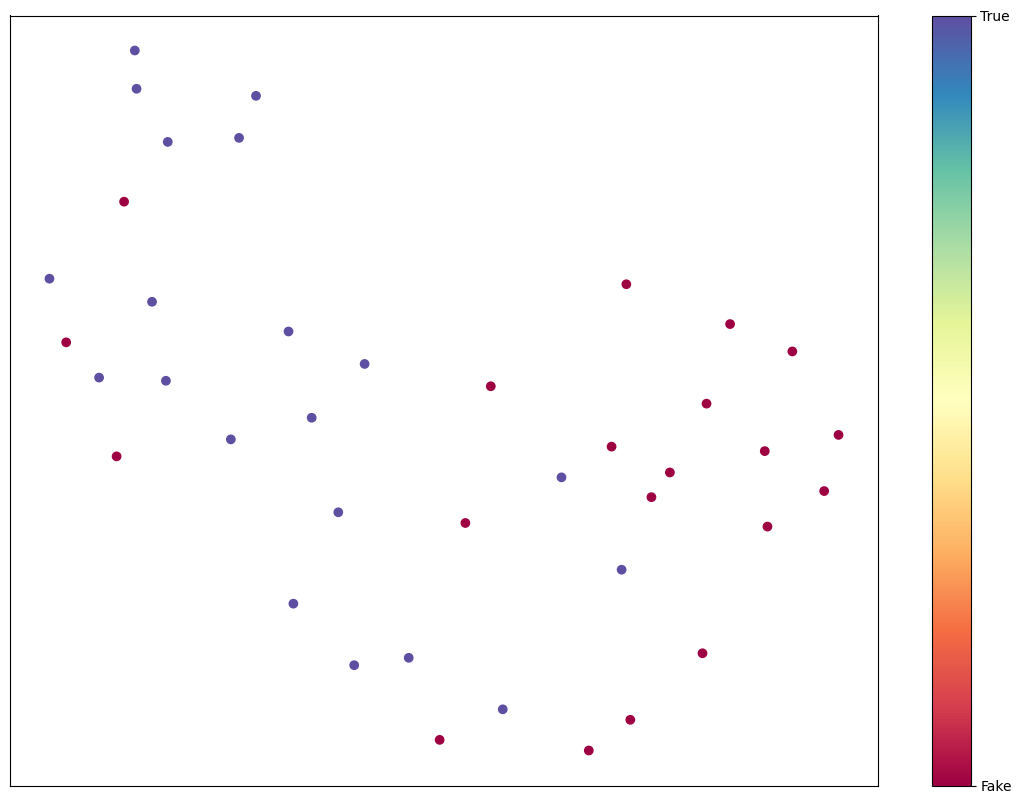

In [4]:
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt

# Assuming embed_fake and embed_true are lists of tensors with shapes (1, 80, 3000)

# Flatten the data
embed_fake_flat = [x.view(-1).numpy() for x in embed_fake]  # Convert each tensor to a flat numpy array
embed_true_flat = [x.view(-1).numpy() for x in embed_true]

target = [0] * len(embed_fake_flat) + [1] * len(embed_true_flat)

# Combine the datasets
combined_data = np.array(embed_fake_flat + embed_true_flat)

# Apply UMAP
umap_reducer = UMAP(n_components=2)  # For 2D visualization
umap_embedding = umap_reducer.fit_transform(combined_data)

print(np.shape(umap_embedding))

# umap_embedding now contains the 2D coordinates of your data

# fig, ax = plt.subplots(1, figsize=(14, 10))
# plt.scatter(*umap_embedding.T, c=target, cmap='Spectral', alpha=1.0)
# plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(target)

fig, ax = plt.subplots(1, figsize=(14, 10))
scatter = plt.scatter(*umap_embedding.T, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

# Create a colorbar with a tick for each group
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_ticklabels(['Fake', 'True'])  # Assuming 0: 'Fake', 1: 'True'

# plt.title('Fashion MNIST Embedded via UMAP using Partial Labels');

#### UMAP on all

In [5]:
import plotly.express as px
embeddings = [load_embd(path_embed + "/" + os.path.splitext(i)[0]) for i in os.listdir("data/embeddings_tensors")]

embedd_flat = [x.view(-1).numpy() for x in embeddings]  # Convert each tensor to a flat numpy array

# Apply UMAP
umap_reducer = UMAP(n_components=2)  # For 2D visualization
umap_embedding = umap_reducer.fit_transform(embedd_flat)

print(np.shape(umap_embedding))

# fig, ax = plt.subplots(1, figsize=(14, 10))
# scatter = plt.scatter(*umap_embedding.T, alpha=1.0)
# plt.setp(ax, xticks=[], yticks=[])
 



(400, 2)


In [6]:
import pandas as pd
df = pd.DataFrame(umap_embedding, columns=['umap1', 'umap2'])
df['label'] = [os.path.splitext(i)[0] for i in os.listdir("data/embeddings_tensors")]
display(df)

,umap1,umap2,label
0,5.206573,8.915182,N09DENCIJ3
1,6.778351,7.277042,Y285MKKJ4J
2,5.255776,9.018251,VKDMNUUZX2
3,2.336960,8.921976,LL7V1S0QG3
4,0.111090,9.545418,LWEWBT96XT
...,...,...,...
395,-1.195957,8.204091,GMEGHRIW0J
396,1.911461,8.566776,XEA040Q8N9
397,5.974365,8.050056,BWGSZNP0LF
398,-1.917884,6.644114,YAAYBNPNBF


In [7]:
fig = px.scatter(df, x = 'umap1', y = 'umap2', width=1200, height=1200, title="UMAP embeddings", hover_name='label')
fig.show()

### Gaussian Mixture Model prediction

In [8]:
display(df)

,umap1,umap2,label
0,5.206573,8.915182,N09DENCIJ3
1,6.778351,7.277042,Y285MKKJ4J
2,5.255776,9.018251,VKDMNUUZX2
3,2.336960,8.921976,LL7V1S0QG3
4,0.111090,9.545418,LWEWBT96XT
...,...,...,...
395,-1.195957,8.204091,GMEGHRIW0J
396,1.911461,8.566776,XEA040Q8N9
397,5.974365,8.050056,BWGSZNP0LF
398,-1.917884,6.644114,YAAYBNPNBF


['Y6K2JU2H4B', 'H01FH3KEY8', 'CBDX295MEZ', 'ZCB53KC2PC', 'XKG8C7QFXT', 'ZGZHPG1TS8', '2IM42LTT5R', '244F8XZK0E', 'ZBKI0P43EK', '3162VQ31V7', 'YDDKTODLGX', '6W361V5VV9', 'BJ53WB0WQB', 'VWEQSW9GQY', 'PASOTPBNLM', '7FPDGERPRV', 'IIBWPCAJFZ', 'R18W797V9Q', 'ROHDD0Z6CG', '1Z2W0U9OU8']
['F68PGID9TU', '12MINIG2V7', '7A8PVRXFLV', '9PS130EZ8T', 'X8L6WJ0NDN', '2TT75RT0RO', 'MIRV2AHSDH', '541T0I3AUW', 'ASLJ66JRJL', 'RLL2WGXJRT', 'FG1GU97VU5', 'H6XNGJ7SCM', 'FI3U0S0S6X', 'NSIOUFFN5C', '0D8CAOL7XN', 'TC1N3OMAN3', 'IU50O8RY55', 'GINYUH6NU7', 'B5PN7WKKMI', 'GE90UVYAIC']


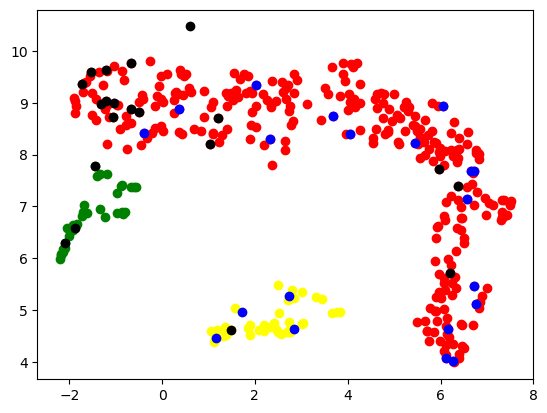

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

gmm = DBSCAN()
gmm.fit(umap_embedding)
# Assign a label to each sample
labels = gmm.fit_predict(umap_embedding)
df['labels_gmm']= labels
d0 = df[df['labels_gmm']== 0]
d1 = df[df['labels_gmm']== 1]
d2 = df[df['labels_gmm']== 2]

# Assuming true_labels_list contains the labels you want to mark as 'true'
# true_labels_list = []  # Replace or extend this list as needed
#  false_labels_list = []

true_labels_list = [os.path.splitext(i)[0] for i in real_data]
false_labels_list = [os.path.splitext(i)[0] for i in fake_data]

print(true_labels_list)
print(false_labels_list)

# Add a new column 'label_gt' based on the condition
# df['label_gt'] = df['label'].apply(lambda x: 'true' if x in true_labels_list else None)
# df['label_gt'] = df['label'].apply(lambda x: 'fake' if x in false_labels_list else None)

df['label_gt'] = df['label'].apply(lambda x: 'true' if x in true_labels_list 
                                   else ('false' if x in false_labels_list else None))


d_true = df[df['label_gt'] == 'true']
d_false = df[df['label_gt'] == 'false']

# plot three clusters in same plot
plt.scatter(d0['umap1'], d0['umap2'], c ='r')
plt.scatter(d1['umap1'], d1['umap2'], c ='yellow')
plt.scatter(d2['umap1'], d2['umap2'], c ='g')
plt.scatter(d_true['umap1'], d_true['umap2'], c ='b')
plt.scatter(d_false['umap1'], d_false['umap2'], c ='black')
plt.show()

In [10]:
df_fake = df[(df['label_gt'] == 'false') & (df['labels_gmm'] == 0) & (df["umap1"]<1) & (df['umap2'] > 8.1)]['label']
display(df_fake)

11     NSIOUFFN5C
31     GE90UVYAIC
33     2TT75RT0RO
145    541T0I3AUW
223    FI3U0S0S6X
289    FG1GU97VU5
325    7A8PVRXFLV
332    F68PGID9TU
335    IU50O8RY55
342    RLL2WGXJRT
Name: label, dtype: object

In [11]:
display(df[df['labels_gmm'] == 1]) 
sel_df = df[df['labels_gmm'] == 1] 
sel_df.to_csv("outliers.csv")

,umap1,umap2,label,labels_gmm,label_gt
13,1.367813,4.524451,35UVJCB74Q,1,None
17,1.161205,4.460478,VWEQSW9GQY,1,true
19,2.198337,4.594385,DXUFMO00FS,1,None
32,2.552929,4.531314,4REKDG0V64,1,None
39,2.324445,4.668224,L4I0OY5T07,1,None
64,2.758377,4.580682,5PK8DKP0ZZ,1,None
82,2.844306,5.232224,AHQQ4HWF9Z,1,None
96,3.659087,4.941721,WOY6M7Y3D8,1,None
111,1.884473,4.511768,8HSVAQ716J,1,None
116,1.858570,4.654093,514WEKM9US,1,None


### Background Noise analysis with spectral gating

Signal-to-Noise Ratio (SNR): 36.273720264434814 dB


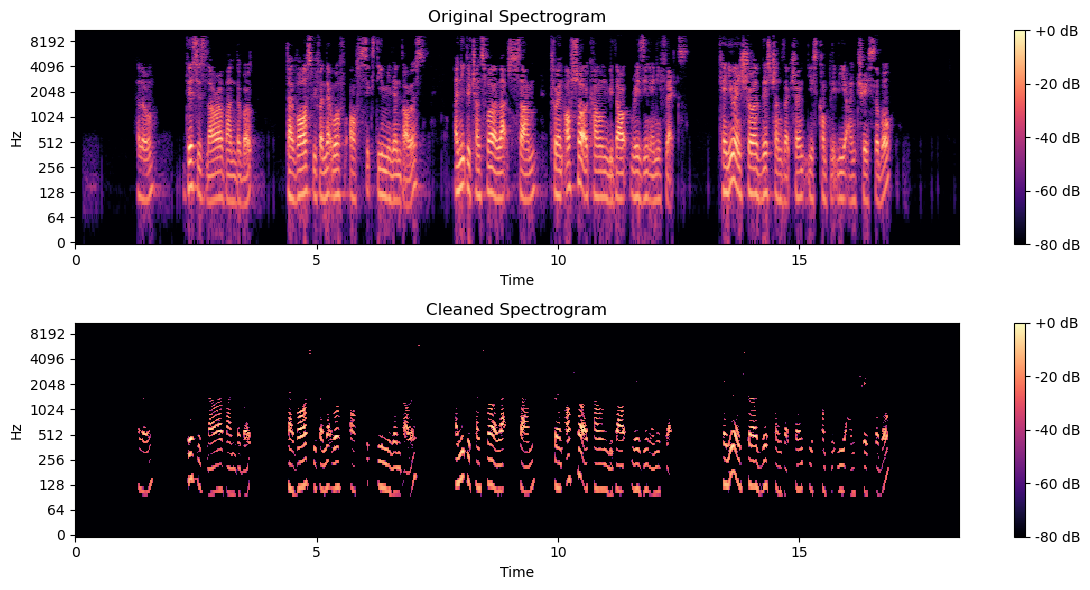

Signal-to-Noise Ratio (SNR): 36.273720264434814 dB


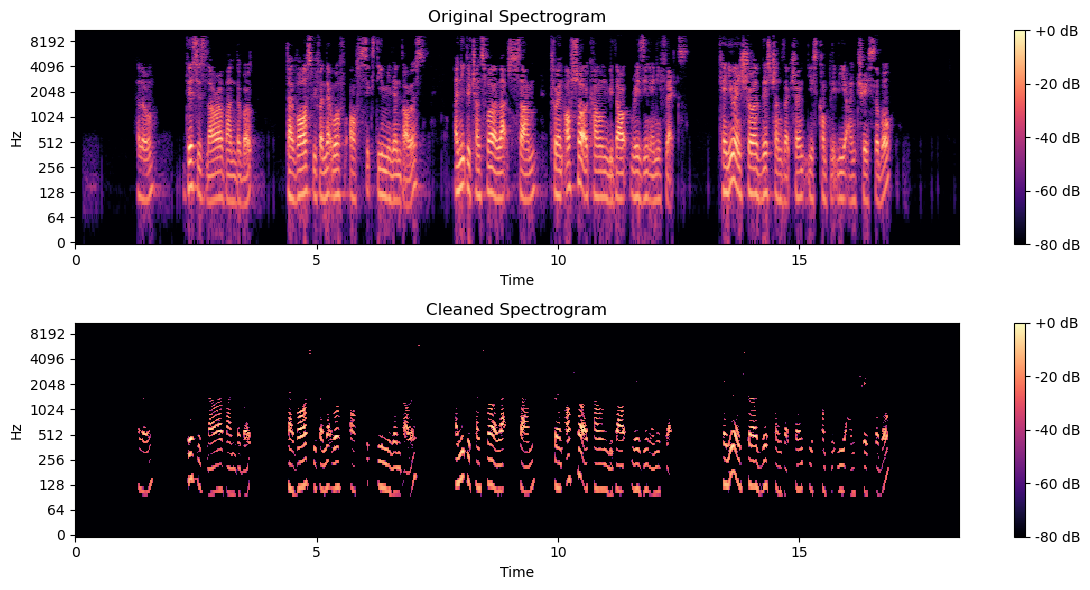

In [12]:
import librosa

file_path_true = "data/clients/true/1Z2W0U9OU8.wav"
sr = 22050
file_path_false = "data/clients/true/1Z2W0U9OU8.wav"
audio, sample_rate = librosa.load(file_path_true, sr=sr)

def audio_analysis(audio, sample_rate):
    stft = librosa.stft(audio)
    magnitude, phase = librosa.magphase(stft)
    
    # Estimate the noise profile (assuming the first second is noise)
    noise_profile = np.mean(magnitude[:,], axis=1)

    # Subtract the noise profile from the magnitude
    noise_threshold = np.median(noise_profile) * 40 # Adjustable threshold
    magnitude_cleaned = magnitude - noise_threshold
    magnitude_cleaned[magnitude_cleaned < 0] = 0

    # Reconstruct the denoised audio signal
    stft_cleaned = magnitude_cleaned * phase
    audio_cleaned = librosa.istft(stft_cleaned)
    
    noise_energy = np.sum(noise_profile**2)

    # Calculate the signal energy
    signal_energy = np.sum(magnitude**2) - noise_energy

    # Calculate Signal-to-Noise Ratio (SNR)
    snr = 10 * np.log10(signal_energy / noise_energy)
    print(f"Signal-to-Noise Ratio (SNR): {snr} dB")
    
    # Plot the original and cleaned magnitude spectrograms
    plt.figure(figsize=(12, 6)) 

    plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sample_rate, y_axis='log', x_axis='time')
    plt.title('Original Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(magnitude_cleaned, ref=np.max), sr=sample_rate, y_axis='log', x_axis='time')
    plt.title('Cleaned Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

audio_analysis(audio, sample_rate)

audio, sample_rate = librosa.load(file_path_false, sr=sr)
audio_analysis(audio, sample_rate)

In [19]:
!pip install pydub
from pydub import AudioSegment
import os

!pip install ffprobe

import ffprobe


def split_audio(file_path, segment_length, output_dir):
    audio = AudioSegment.from_file(file_path)
    total_length = len(audio)
    num_segments = total_length // (segment_length * 1000) 

    os.makedirs(output_dir, exist_ok=True)
    
    for i in range(num_segments + 1):
        start_time = i * segment_length * 1000 # in milliseconds
        end_time = min((i + 1) * segment_length * 1000, total_length)
        segment = audio[start_time:end_time]
        
        segment.export(os.path.join(output_dir, f"segment_{i+1}.wav"), format="wav")
        print(f"Exported segment_{i+1}.wav")

# Example usage
file_path = "data/clients/true/1Z2W0U9OU8.wav"
segment_length = 10  # Length of each segment in seconds
output_dir = "data/clients/true_seg"


wav_file = AudioSegment.from_file(file = file_path, format="wav")

# split_audio(file_path, segment_length, output_dir)

ImportError: cannot import name 'FFProbe' from partially initialized module 'ffprobe' (most likely due to a circular import) (/Users/fabianjaeger/miniconda/lib/python3.10/site-packages/ffprobe/__init__.py)

In [40]:

import librosa
import torch
import matplotlib.pyplot as plt

segmnent_size = 0.05 # 50 ms segments
sr = 22050
hop_length = int(sr * segmnent_size)

def segment_file(waveform, segment_size = segmnent_size, sr = sr, hop_length = hop_length):
    # Load the audio file
    y, sr = librosa.load(waveform)

    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)
    print(D.shape)

    # Calculate the number of frames that correspond to the segment_size in seconds
    frames_per_segment = segment_size * sr // hop_length

    # Splitting the tensor into chunks along the time dimension (1st dimension)
    segments = torch.split(torch.tensor(D, dtype=torch.complex64), frames_per_segment, dim=1)

    # Printing the shape of each segment to verify
    for i, segment in enumerate(segments):
        print(f"Segment {i+1}: {segment.shape}")
    
    # Plotting the original audio signal
    plt.figure(figsize=(12, 6))
    plt.plot(y)
    plt.title("Original Audio Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    return segments

# wav_file = "data/clients/false/0D8CAOL7XN.wav"
# segment_file(wav_file)


wav_file = "data/clients/false/0D8CAOL7XN.wav"
segment_file(wav_file)

(1025, 433)


TypeError: split_with_sizes(): argument 'split_sizes' (position 2) must be tuple of ints, not float

In [ ]:
# dataset = load_dataset("audio", data_files=file_names)

from datasets import Dataset, Audio
  
ds = Dataset.from_dict({"audio": file_names}).cast_column("audio", Audio())

In [30]:
import numpy as np 
# path_file = "data/clients/true/1Z2W0U9OU8.wav"
# y, sr = librosa.load(path_file, sr=None)
# print(y)

segment_size = 50

path_file = "data/embeddings_tensors/0P2ZQ4BASS.pt"
embed = torch.load(path_file)
print(embed)
print(np.shape(embed))

# Splitting the tensor into chunks of size 3000 along the 0th dimension
segments = torch.split(embed, segment_size, dim=2)

# Printing the shape of each segment to verify
for i, segment in enumerate(segments):
    print(f"Segment {i+1}: {segment.shape}")

tensor([[[-0.6043, -0.1785, -0.1174,  ..., -0.6043, -0.6043, -0.6043],
         [-0.5193, -0.1765,  0.0466,  ..., -0.6043, -0.6043, -0.6043],
         [-0.6043, -0.3009,  0.0169,  ..., -0.6043, -0.6043, -0.6043],
         ...,
         [-0.6043, -0.6043, -0.6043,  ..., -0.6043, -0.6043, -0.6043],
         [-0.6043, -0.6043, -0.6043,  ..., -0.6043, -0.6043, -0.6043],
         [-0.6043, -0.6043, -0.6043,  ..., -0.6043, -0.6043, -0.6043]]])
torch.Size([1, 80, 3000])
Segment 1: torch.Size([1, 80, 50])
Segment 2: torch.Size([1, 80, 50])
Segment 3: torch.Size([1, 80, 50])
Segment 4: torch.Size([1, 80, 50])
Segment 5: torch.Size([1, 80, 50])
Segment 6: torch.Size([1, 80, 50])
Segment 7: torch.Size([1, 80, 50])
Segment 8: torch.Size([1, 80, 50])
Segment 9: torch.Size([1, 80, 50])
Segment 10: torch.Size([1, 80, 50])
Segment 11: torch.Size([1, 80, 50])
Segment 12: torch.Size([1, 80, 50])
Segment 13: torch.Size([1, 80, 50])
Segment 14: torch.Size([1, 80, 50])
Segment 15: torch.Size([1, 80, 50])
S

In [ ]:
# dataset = load_dataset("audio", data_files=file_names)

from datasets import Dataset, Audio
 
ds = Dataset.from_dict({"audio": file_names}).cast_column("audio", Audio())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Replace with your actual file paths and labels
authentic_files = ['authentic1.wav', 'authentic2.wav', ...]
impersonated_files = ['impersonated1.wav', 'impersonated2.wav', ...]

authentic_labels = [0] * len(authentic_files)  # Label 0 for authentic
impersonated_labels = [1] * len(impersonated_files)  # Label 1 for impersonated

files = authentic_files + impersonated_files
labels = authentic_labels + impersonated_labels

# Extract features
features = np.array([extract_features(file) for file in files])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [ ]:
hop_length = 1024
y_ref, sr1 = librosa.load(r"audio1.wav")
y_comp, sr2 = librosa.load(r"audio2.wav")
chroma_ref = librosa.feature.chroma_cqt(y=y_ref, sr=sr1, hop_length=hop_length)
chroma_comp = librosa.feature.chroma_cqt(y=y_comp, sr=sr2, hop_length=hop_length)

mfcc1 = librosa.feature.mfcc(y_ref, sr1, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y_comp, sr2, n_mfcc=13)

# Use time-delay embedding to get a cleaner recurrence matrix
x_ref = librosa.feature.stack_memory(chroma_ref, n_steps=10, delay=3)
x_comp = librosa.feature.stack_memory(chroma_comp, n_steps=10, delay=3)

sim = librosa.segment.cross_similarity(x_comp, x_ref, metric='cosine')
print(sim)

In [ ]:
!pip install resemblyzer
!pip install demo_utils

ERROR: Could not find a version that satisfies the requirement demo_utils (from versions: none)
ERROR: No matching distribution found for demo_utils


In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder
# from demo_utils import *
from pathlib import Path
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# DEMO 05: In this demo we'll show how we can achieve a modest form of fake speech detection with 
# Resemblyzer. This method assumes you have some reference audio for the target speaker that you 
# know is real, so it is not a universal fake speech detector on its own.
# In the audio data directory we have 18 segments of Donald Trump. 12 are real and extracted from
# actual speeches, while the remaining 6 others are fake and generated by various users on 
# youtube, with a high discrepancy of voice cloning quality and naturalness achieved. We will 
# take 6 segments of real speech as ground truth reference and compare those against the 12 
# remaining. Those segments are selected at random, so will run into different results every time
# you run the script, but they should be more or less consistent.
# Using the voice of Donald Trump is merely a matter of convenience, as several fake speeches 
# with his voice were already put up on youtube. This choice was not politically motivated.


## Load and preprocess the audio
data_dir = Path("audio_data", "donald_trump")
wav_fpaths = list(data_dir.glob("**/*.mp3"))
wavs = [preprocess_wav(wav_fpath) for wav_fpath in \
        tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit=" utterances")]


## Compute the embeddings
encoder = VoiceEncoder()
embeds = np.array([encoder.embed_utterance(wav) for wav in wavs])
speakers = np.array([fpath.parent.name for fpath in wav_fpaths])
names = np.array([fpath.stem for fpath in wav_fpaths])


# Take 6 real embeddings at random, and leave the 6 others for testing
gt_indices = np.random.choice(*np.where(speakers == "real"), 6, replace=False) 
mask = np.zeros(len(embeds), dtype=bool)
mask[gt_indices] = True
gt_embeds = embeds[mask]
gt_names = names[mask]
gt_speakers = speakers[mask]
embeds, speakers, names = embeds[~mask], speakers[~mask], names[~mask]


## Compare all embeddings against the ground truth embeddings, and compute the average similarities.
scores = (gt_embeds @ embeds.T).mean(axis=0)

# Order the scores by decreasing order
sort = np.argsort(scores)[::-1]
scores, names, speakers = scores[sort], names[sort], speakers[sort]


## Plot the scores
fig, _ = plt.subplots(figsize=(6, 6))
indices = np.arange(len(scores))
plt.axhline(0.84, ls="dashed", label="Prediction threshold", c="black")
plt.bar(indices[speakers == "real"], scores[speakers == "real"], color="green", label="Real")
plt.bar(indices[speakers == "fake"], scores[speakers == "fake"], color="red", label="Fake")
plt.legend()
plt.xticks(indices, names, rotation="vertical", fontsize=8)
plt.xlabel("Youtube video IDs")
plt.ylim(0.7, 1)
plt.ylabel("Similarity to ground truth")
fig.subplots_adjust(bottom=0.25)
plt.show()

Preprocessing wavs: 0 utterances [00:00, ? utterances/s]

Loaded the voice encoder model on cpu in 0.01 seconds.


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
data_dir = Path("audio_data", "librispeech_train-clean-100")
data_dir = Path("audio_data", "all")
wav_fpaths = list(data_dir.glob("*.wav"))
speakers = [fpath.stem.split("-")[0] for fpath in wav_fpaths]
wavs = [preprocess_wav(wav_fpath) for wav_fpath in \
        tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit=" utterances")]

# # Get the sex of each speaker from the metadata file
# with data_dir.joinpath("SPEAKERS.TXT").open("r") as f:
#     sexes = dict(l.replace(" ", "").split("|")[:2] for l in f if not l.startswith(";"))
# markers = ["x" if sexes[speaker] == "M" else "o" for speaker in speakers]
# colors = ["black"] * len(speakers)


## Compute the embeddings
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))


## Project the embeddings in 2D space. 
_, ax = plt.subplots(figsize=(6, 6))
# Passing min_dist=1 to UMAP will make it so the projections don't necessarily need to fit in 
# clusters, so that you can have a better idea of what the manifold really looks like. 
projs = plot_projections(utterance_embeds, speakers, ax, colors, markers, False,
                         min_dist=1)
ax.set_title("Embeddings for %d speakers" % (len(speakers)))
ax.scatter([], [], marker="x", c="black", label="Male speaker")
ax.scatter([], [], marker="o", c="black", label="Female speaker")

# Separate the data by the sex
classifier = LogisticRegression(solver="lbfgs")
classifier.fit(projs, markers)
x = np.linspace(*ax.get_xlim(), num=200)
y = -(classifier.coef_[0, 0] * x + classifier.intercept_) / classifier.coef_[0, 1]
mask = (y > ax.get_ylim()[0]) & (y < ax.get_ylim()[1])
ax.plot(x[mask], y[mask], label="Decision boundary")

ax.legend()
plt.show()

In [ ]:
!pip install torch torchvision torchaudio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:00a 0:00:010m


In [ ]:
import os
import random
from glob import glob
from typing import List, Optional, Union, Dict

import tqdm
import torch
import torchaudio
import numpy as np
import pandas as pd
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import functional as F
from transformers import (
    AutoFeatureExtractor,
    AutoModelForAudioClassification,
    Wav2Vec2Processor
)

In [ ]:
!pip install torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 14.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0.post100
    Uninstalling torch-2.1.0.post100:
      Successfully uninstalled torch-2.1.0.post100


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(
        self,
        dataset: List,
        basedir: Optional[str] = None,
        sampling_rate: int = 16000,
        max_audio_len: int = 5,
    ):
        self.dataset = dataset
        self.basedir = basedir

        self.sampling_rate = sampling_rate
        self.max_audio_len = max_audio_len

    def __len__(self):
        """
        Return the length of the dataset
        """
        return len(self.dataset)

    def __getitem__(self, index):
        if self.basedir is None:
            filepath = self.dataset[index]
        else:
            filepath = os.path.join(self.basedir, self.dataset[index])

        speech_array, sr = torchaudio.load(filepath)

        if speech_array.shape[0] > 1:
            speech_array = torch.mean(speech_array, dim=0, keepdim=True)

        if sr != self.sampling_rate:
            transform = torchaudio.transforms.Resample(sr, self.sampling_rate)
            speech_array = transform(speech_array)
            sr = self.sampling_rate

        len_audio = speech_array.shape[1]

        # Pad or truncate the audio to match the desired length
        if len_audio < self.max_audio_len * self.sampling_rate:
            # Pad the audio if it's shorter than the desired length
            padding = torch.zeros(1, self.max_audio_len * self.sampling_rate - len_audio)
            speech_array = torch.cat([speech_array, padding], dim=1)
        else:
            # Truncate the audio if it's longer than the desired length
            speech_array = speech_array[:, :self.max_audio_len * self.sampling_rate]

        speech_array = speech_array.squeeze().numpy()

        return {"input_values": speech_array, "attention_mask": None}


from custom_dataset import CustomDataset
import multiprocessing

def some_function_that_uses_multiprocessing():
    # Your code that uses multiprocessing

if __name__ == '__main__':
    some_function_that_uses_multiprocessing()

class CollateFunc:
    def __init__(
        self,
        processor: Wav2Vec2Processor,
        padding: Union[bool, str] = True,
        pad_to_multiple_of: Optional[int] = None,
        return_attention_mask: bool = True,
        sampling_rate: int = 16000,
        max_length: Optional[int] = None,
    ):
        self.sampling_rate = sampling_rate
        self.processor = processor
        self.padding = padding
        self.pad_to_multiple_of = pad_to_multiple_of
        self.return_attention_mask = return_attention_mask
        self.max_length = max_length

    def __call__(self, batch: List[Dict[str, np.ndarray]]):
        # Extract input_values from the batch
        input_values = [item["input_values"] for item in batch]

        batch = self.processor(
            input_values,
            sampling_rate=self.sampling_rate,
            return_tensors="pt",
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_attention_mask=self.return_attention_mask
        )

        return {
            "input_values": batch.input_values,
            "attention_mask": batch.attention_mask if self.return_attention_mask else None
        }


def predict(test_dataloader, model, device: torch.device):
    """
    Predict the class of the audio
    """
    model.to(device)
    model.eval()
    preds = []

    with torch.no_grad():
        for batch in tqdm.tqdm(test_dataloader):
            input_values, attention_mask = batch['input_values'].to(device), batch['attention_mask'].to(device)

            logits = model(input_values, attention_mask=attention_mask).logits
            scores = F.softmax(logits, dim=-1)

            pred = torch.argmax(scores, dim=1).cpu().detach().numpy()

            preds.extend(pred)

    return preds


def get_gender(model_name_or_path: str, audio_paths: List[str], label2id: Dict, id2label: Dict, device: torch.device):
    num_labels = 2

    feature_extractor = AutoFeatureExtractor.from_pretrained(model_name_or_path)
    model = AutoModelForAudioClassification.from_pretrained(
        pretrained_model_name_or_path=model_name_or_path,
        num_labels=num_labels,
        label2id=label2id,
        id2label=id2label,
    )

    test_dataset = CustomDataset(audio_paths, max_audio_len=5)  # for 5-second audio

    data_collator = CollateFunc(
        processor=feature_extractor,
        padding=True,
        sampling_rate=16000,
    )

    test_dataloader = DataLoader(
        dataset=test_dataset,
        batch_size=16,
        collate_fn=data_collator,
        shuffle=False,
        num_workers=2
    )

    preds = predict(test_dataloader=test_dataloader, model=model, device=device)

    return preds

In [ ]:
from datasets import load_dataset
import os 

def get_path_names(directory):
    extension = "wav"
    file_names = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                # file_names.append(file)
                file_names.append(os.path.join(root, file))
    return file_names

file_names = get_path_names("data/audio_data/all")
print(file_names)

['data/audio_data/all/72K6TSQ829.wav', 'data/audio_data/all/O7O51MZU4N.wav', 'data/audio_data/all/1PSFC9GSK4.wav', 'data/audio_data/all/1JGXELMHOF.wav', 'data/audio_data/all/VXC2DB72R7.wav', 'data/audio_data/all/MMPJO0MZ0N.wav', 'data/audio_data/all/UMM0YIUKNH.wav', 'data/audio_data/all/WML4D26C67.wav', 'data/audio_data/all/F3AJRF7TJG.wav', 'data/audio_data/all/1QJIZTDX38.wav', 'data/audio_data/all/G11VNYE1HH.wav', 'data/audio_data/all/0D9KDY33VL.wav', 'data/audio_data/all/VLGVUDJ90Q.wav', 'data/audio_data/all/Y6K2JU2H4B.wav', 'data/audio_data/all/ECGD9KF3VX.wav', 'data/audio_data/all/GT37129NRX.wav', 'data/audio_data/all/XXGLDEB0PE.wav', 'data/audio_data/all/PYVE80HN4Y.wav', 'data/audio_data/all/8R488ER0ZH.wav', 'data/audio_data/all/65YME8J8IE.wav', 'data/audio_data/all/NPVTQJD50W.wav', 'data/audio_data/all/RL9JXFY2JE.wav', 'data/audio_data/all/FSO4MWKKAR.wav', 'data/audio_data/all/HEHXM9668B.wav', 'data/audio_data/all/FPLK2Z9M1O.wav', 'data/audio_data/all/FJDGLG7POQ.wav', 'data/audio

In [ ]:
model_name_or_path = "alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech"

audio_paths = [] # Must be a list with absolute paths of the audios that will be used in inference
audio_paths = file_names
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label2id = {
    "female": 0,
    "male": 1
}

id2label = {
    0: "female",
    1: "male"
}

num_labels = 2

preds = get_gender(model_name_or_path, audio_paths, label2id, id2label, device)

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.p

RuntimeError: DataLoader worker (pid(s) 12252) exited unexpectedly